## Задача 1. Интерполяция и МНК, выписать расчетные формулы текстом

Интерполировать таблицу многочленом с помощью заданного метода решения СЛАУ. При решении задачи рассказать суть заданного метода и наглядно показать его применение. Если задача не имеет решения заданным методом, объяснить почему.

Вариант 1.1 Метод Крамера.


## Задача 2. Численное интегрирование

Полученную зависимость в задаче 1 интегрировать аналитически на всем заданном в таблице интервале (от крайней левой до крайне правой точки, проще говоря), и найти интеграл заданным численным методом, написать суть численного метода интегрирования и показать наглядно его применение. Сравнить полученные значения и рассчитать ошибку численного интегрирования. Построить графики функций: заданной таблично и аппроксимирующей в одних осях.

Вариант 2.6 методом левых прямоугольников с шагом 0.1



Таблицы с данными для первых двух заданий.

Вариант Т8

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline-1,30 & -1,00 & -0,70 & -0,40 & -0,10 & 0,20 & 0,50 & 0,80 & 1,10 & 1,40 \\
\hline 104,33 & 35,80 & 8,33 & -1,08 & -1,25 & 3,77 & 10,75 & 14,67 & 3,42 & -54,33 \\
\hline
\end{array}
$$


## Решение задачи 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

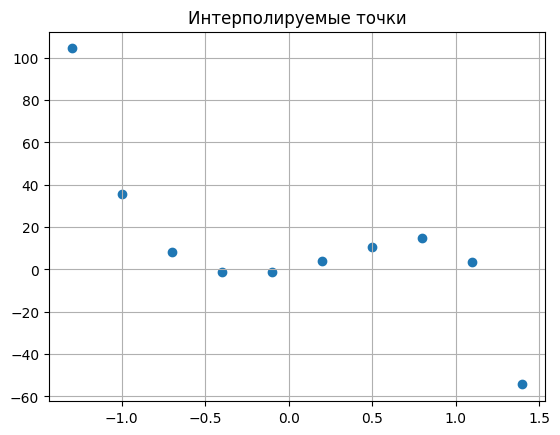

In [3]:
x = np.array([-1.3, -1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.1, 1.4])
y = np.array([104.33, 35.8, 8.33, -1.08, -1.25, 3.77, 10.75, 14.67, 3.42, -54.33])
plt.scatter(x, y)
plt.title('Интерполируемые точки')
plt.grid(True)
plt.show()

Составим матрицу Вандермонда:

In [4]:
B = np.vander(x)

Теперь нужно решить СЛАУ вида Ba=y, где а - столбец коэффициентов полинома

Метод Крамера: определяем определитель матрицы B, а также определители матриц, в которых столбцы заменяются на столбец свободных членов (y), соответствующий элемент столбца а определяется их отношением

In [5]:
det = np.linalg.det(B)
a=[]
for i in range (0,10):
    matrix = np.copy(B)
    matrix[:,i]=y
    a.append(1/det*np.linalg.det(matrix))

a ## Столбец коэффициентов полинома

[-0.028001137249472,
 0.008820358233572339,
 -3.604250384466533,
 -0.017699518855395276,
 -5.904877023037471,
 0.006746692012894685,
 -18.252549721955408,
 22.999577716529174,
 14.98757235717873,
 0.00044884254947121237]

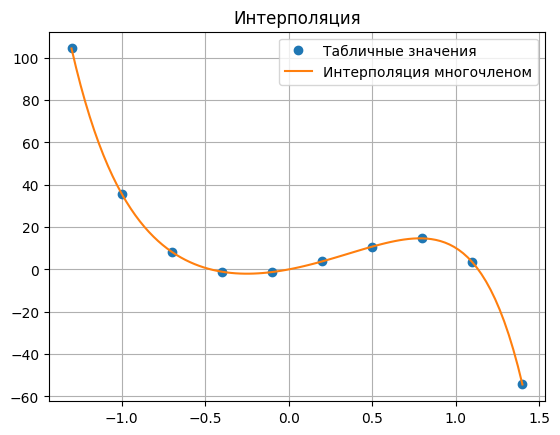

In [6]:
x_1= np.linspace(-1.3, 1.4, 100)
y_1 = np.polyval(a, x_1)
plt.plot(x, y,'o', x_1, y_1, '-')
plt.legend(['Табличные значения', 'Интерполяция многочленом'])
plt.title('Интерполяция')
plt.grid(True)
plt.show()

## Решение задачи 2

Запишем полином и проинтегрируем его аналитически:

In [7]:
import sympy as smp
t = smp.symbols('t')
display(-3.6*t**7-5.9*t**5-18.25*t**3+23*t**2+15*t) ## полином в пренебрежении малыми коэффициентами
f = smp.integrate(-3.6*t**7-5.9*t**5-18.25*t**3+23*t**2+15*t) ## первообразная
f.subs(t,1.4)-f.subs(t,-1.3) ## По формуле Ньютона-Лейбница

-3.6*t**7 - 5.9*t**5 - 18.25*t**3 + 23*t**2 + 15*t

29.7817121925000

Аналитически значение интеграла примерно 29.8

Численно методом прямоугольников: разбиваем ось икс с шагом 0.1 и считаем суммы (X_(n+1)-X_(n))*f(X_(n))

In [8]:
dots = np.linspace(-1.3, 1.4, 28)
integral = 0
for i in range (0,27):
    integral+=np.polyval(a, dots[i])*(dots[i+1]-dots[i])

integral

37.6743504039018

Результат получился достаточно далеким от полученного аналитическим способом. Попробуем уменьшить шаг:

In [9]:
dots = np.linspace(-1.3, 1.4, 1000)  ## Шаг уменьшается путем увеличения точек в разбиении
integral = 0
for i in range (0,999):
    integral+=np.polyval(a, dots[i])*(dots[i+1]-dots[i])

integral

29.946626968739345

In [10]:
dots = np.linspace(-1.3, 1.4, 10000)
integral = 0
for i in range (0,9999):
    integral+=np.polyval(a, dots[i])*(dots[i+1]-dots[i])

integral

29.753636285540292

Как видно, чем меньше шаг, тем ближе результат к аналитическому рассчету

### **Задача 3. Интерполяция - письменное решение с возможными элементами кода (для вычисления коэффициентов). Надо написать, какие формулы использовались и почему.**

Вариант 3.4

Многочлен Лагранжа. Записать многочлен Лагранжа для таблицы значений и найти недостающие значения таблицы

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline 0,7 & 0,8 & 0,9 & 1 & 1,1 & 1,2 & 1,3 & 1,4 & 1,5 & 1,6 & 1,8 \\
\hline-0,6555 & & -0,1105 & 0 & 0,07 & & 0,0345 & -0,08 & & -0,48 & -0,77 \\
\hline
\end{array}
$$

## Решение задачи 3

$$ L_n(x) = \sum_{i=0}^n y_i\cdot l_i(x)$$

$$ l_i(x) = \prod_{j=0, j\ne i}^n \frac{x-x_j}{x_i-x_j}$$

В нашем случае n = 10. 

Недостающие значения y_i найдем, построив частичный полином Лагранжа по известным значениям, например, $$L(0.8)=\sum_{i=0}^n y_i\cdot l_i(0.8)$$

In [11]:
from scipy.interpolate import lagrange

# Заданные данные
x_known = np.array([0.7, 0.9, 1.0, 1.1, 1.3, 1.4, 1.6, 1.8])
y_known = np.array([-0.6555, -0.1105, 0, 0.07, 0.0345, -0.08, -0.48, -0.77])

# Построение интерполяционного многочлена Лагранжа
poly = lagrange(x_known, y_known)

# Точки, для которых нужно найти y
x_missing = np.array([0.8, 1.2, 1.5])

# Вычисление пропущенных значений y
y_missing = poly(x_missing)

print('Пропущенные значения соответственно равны:' , y_missing)


Пропущенные значения соответственно равны: [-0.28035065  0.08472511 -0.25469913]


### **Задача 4. Анализ ошибок численного интегрирования.**

На основе своего варианта задачи 2

- оцените ошибку с помощью правила Рунге

- проверьте, выполнены ли условия корректности применения правила Рунге

- примените экстраполяцию Ричардсона и сравните с аналитическим ответом (найти ошибку)

- вычислите интеграл, используя квадратуры Гаусса с n = 2, 3, 4, 5, 6 точками (по формулам с https://toomanydigits.online/Block4/Sem2/3.html# ). Нарисуйте график ошибки в зависимости от количества точек n



## Решение задачи 4

In [12]:
def integrate(array, n):
    dots = np.linspace(-1.3, 1.4, n)
    integral_h = 0
    for i in range (0, n-1):
        integral_h+=np.polyval(array, dots[i])*(dots[i+1]-dots[i])
    return integral_h

In [20]:
epsilon = 0.01
integral_h = integrate(a, 10)
integral_h_2 = integrate(a, 20)
delta = integral_h-integral_h_2 ## Выберем р=1
delta_array = []  ## Для проверки первого условия применимости
const_array = []  ## Для проверки второго условия применимости
const_array.append(delta*20) 
delta_array.append(delta)
i=2
while delta > epsilon:
    integral = integral_h_2
    integral_new = integrate(a, 2**i*10)
    delta = np.abs(integral_new-integral)
    delta_array.append(delta)
    const_array.append(delta*2**i*10)
    integral_h_2 = integral_new
    i+=1

print('Значение интеграла и ошибка равны соответственно:', integral_h_2, ",", delta)


Значение интеграла и ошибка равны соответственно: 29.737444381728046 , 0.005229667239603941


In [16]:
for i in range (0, np.shape(delta_array)[0]-1):
    print(delta_array[i+1]/delta_array[i])

0.4600360498131579
0.4803903682210562
0.49027107218585925
0.49515266267902236
0.49758039974222285
0.49879119135550354
0.4993958404094743
0.49969798099918256
0.49984900565635654
0.4999245066067676
0.4999622542174043


1-ое условие корректности выполняется (в нашем случае p=1, и отношение дельт должно быть равным 1/2)

In [18]:
const_array

[251.95760693606275,
 231.81916443048522,
 222.72738752291673,
 218.3935901720315,
 216.27633537142515,
 215.22973081779355,
 214.70938769946315,
 214.4499502279541,
 214.3204143085677,
 214.25569196799188,
 214.22334218957985,
 214.20717013417743]

2-ое условие применимости тоже выполняется: отношение дельты к шагу разбиения примерно константа

Вычисление через квадратуры Гаусса:

In [21]:
from scipy.special import roots_legendre

In [26]:
def gauss_n(n, a = -1.3, b = 1.4):

    roots, weights = roots_legendre(n) 
    adjusted_roots = (b - a)/2 * roots + (a + b)/2
    adjusted_weigths = weights*(b-a)/2
    return adjusted_roots, adjusted_weigths

In [29]:
## n=2
integral_2 = 0
for i in range (0,2):
    integral_2 += gauss_n(2)[1][i]*np.polyval(a, gauss_n(2)[0][i])

## n=3
integral_3 = 0
for i in range (0,3):
    integral_3 += gauss_n(3)[1][i]*np.polyval(a, gauss_n(3)[0][i])

## n=4
integral_4 = 0
for i in range (0,4):
    integral_4 += gauss_n(4)[1][i]*np.polyval(a, gauss_n(4)[0][i])

## n=5
integral_5 = 0
for i in range (0,5):
    integral_5 += gauss_n(5)[1][i]*np.polyval(a, gauss_n(5)[0][i])

## n=6
integral_6 = 0
for i in range (0,6):
    integral_6 += gauss_n(6)[1][i]*np.polyval(a, gauss_n(6)[0][i])

integral_2, integral_3, integral_4, integral_5, integral_6

(33.13970620814731,
 30.214382025585977,
 29.73286862686772,
 29.7322149776786,
 29.732214977678563)

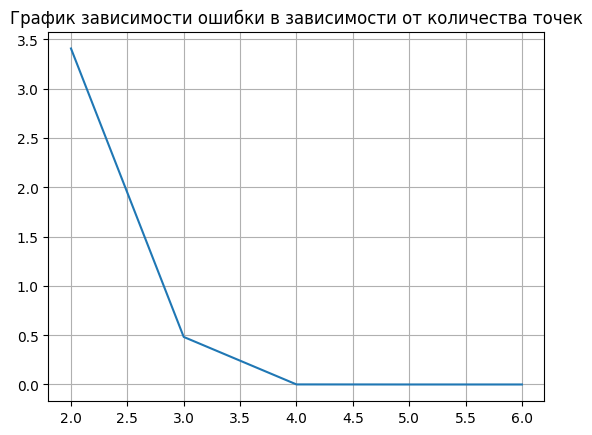

In [30]:
numbers = [2, 3, 4, 5, 6]
errors = [integral_2-29.732, integral_3-29.732, integral_4-29.732, integral_5-29.732, integral_6-29.732]
plt.plot(numbers, errors)
plt.title('График зависимости ошибки в зависимости от количества точек')
plt.grid(True)
plt.show()